___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
X_train[6].shape

(28, 28)

In [6]:
X_train[6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

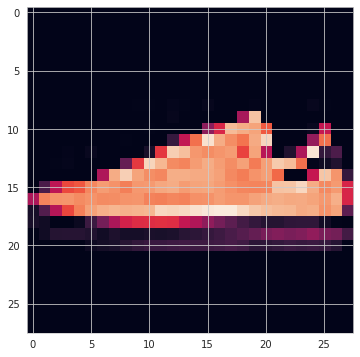

In [7]:
plt.imshow(X_train[6])
# plt.matshow(X_train[6])

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
y_train[6]

7

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [10]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

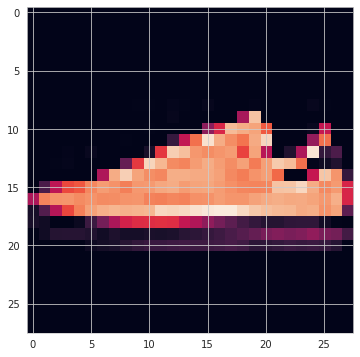

In [11]:
plt.imshow(X_train[6])

In [12]:
y_train[6]

7

In [13]:
classes[int(y_train[6])]

'Sneaker'

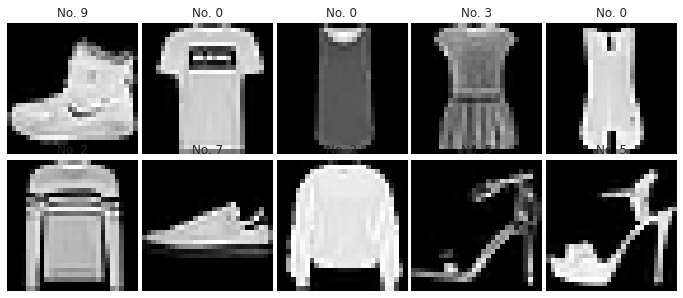

In [14]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [15]:
X_train[6].min()

0

In [16]:
X_train[6].max()

255

In [17]:
X_train = X_train.astype('float32')    # Between 0 and 1.
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [18]:
X_train[6].min()

0.0

In [19]:
X_train[6].max()  

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [20]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [21]:
X_train.reshape(60000, 28, 28, 1).shape   # We define the channel. 

(60000, 28, 28, 1)

In [22]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [23]:
X_train.shape, X_test.shape    

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [24]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [25]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [26]:
from tensorflow.keras.utils import to_categorical  

In [27]:
Y_train = to_categorical(y_train, 10)  
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [28]:
y_train[6]

7

In [29]:
Y_train[6]    # one hot encoding 

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,BatchNormalization  # öncesinde  hepsini import ediyorum.

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

# Modelling-1

In [33]:
model1 = Sequential()

model1.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) 
model1.add(Conv2D(filters=28, kernel_size=(3,3),activation='relu')) 
model1.add(MaxPool2D(pool_size=(2, 2))) 


model1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2))) 


model1.add(Flatten())           

model1.add(Dense(128, activation='relu'))  # We get bad results when dropout = 0.5 !!!
model1.add(Dropout(0.1))
model1.add(Dense(256, activation='relu'))  
model1.add(Dropout(0.1))
model1.add(Dense(64, activation='relu'))   
model1.add(Dropout(0.1))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.1))

model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [34]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 28)        7084      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 28)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        8096      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)

In [37]:
model1.fit(X_train, Y_train, batch_size=32, epochs=30, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/30
1875/1875 [==============================] - 13s 5ms/step - loss: 0.5633 - accuracy: 0.7965 - val_loss: 0.3711 - val_accuracy: 0.8703
Epoch 2/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3466 - accuracy: 0.8820 - val_loss: 0.3289 - val_accuracy: 0.8881
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3147 - accuracy: 0.8918 - val_loss: 0.3170 - val_accuracy: 0.8888
Epoch 4/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3084 - accuracy: 0.8977 - val_loss: 0.3188 - val_accuracy: 0.8902
Epoch 5/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3074 - accuracy: 0.8978 - val_loss: 0.3020 - val_accuracy: 0.8991
Epoch 6/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3113 - accuracy: 0.8993 - val_loss: 0.3041 - val_accuracy: 0.8945
Epoch 7/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3254 - accuracy: 0.8957 - val_loss: 0.3305 - val_ac

In [38]:
model1.metrics_names

['loss', 'accuracy']

In [39]:
summary = pd.DataFrame(model1.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.563,0.797,0.371,0.870
1,0.347,0.882,0.329,0.888
2,0.315,0.892,0.317,0.889
3,0.308,0.898,0.319,0.890
4,0.307,0.898,0.302,0.899


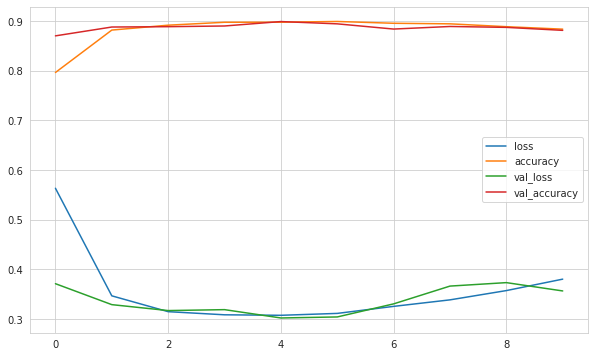

In [40]:
summary.plot();

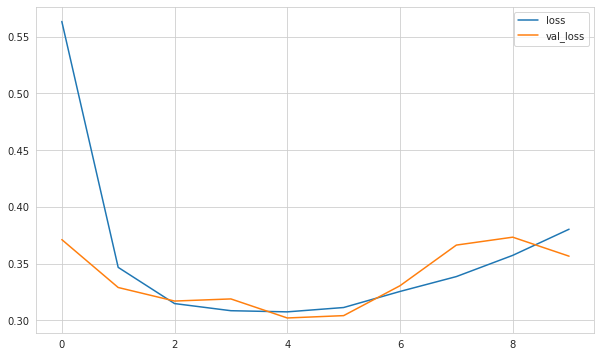

In [43]:
summary[["loss", "val_loss"]].plot();

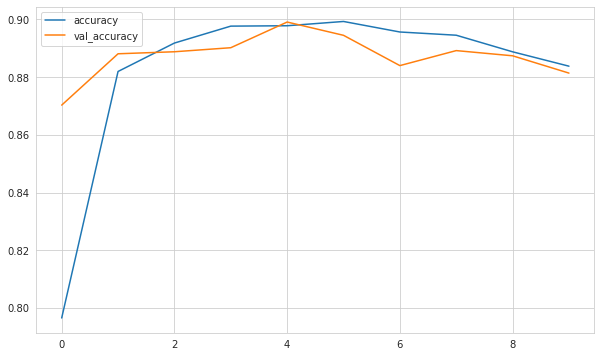

In [44]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
model1.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3020 - accuracy: 0.8991


[0.30204281210899353, 0.8991000056266785]

In [48]:
score = model1.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.30204281210899353
Test accuracy: 0.8991000056266785


In [49]:
pred_prob = model1.predict(X_test)

In [50]:
y_pred = np.argmax(pred_prob, axis=1)

In [51]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.90      0.81      0.85      1000
           3       0.87      0.94      0.90      1000
           4       0.78      0.92      0.84      1000
           5       0.97      0.98      0.98      1000
           6       0.73      0.67      0.70      1000
           7       0.93      0.97      0.95      1000
           8       0.99      0.96      0.97      1000
           9       0.98      0.93      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



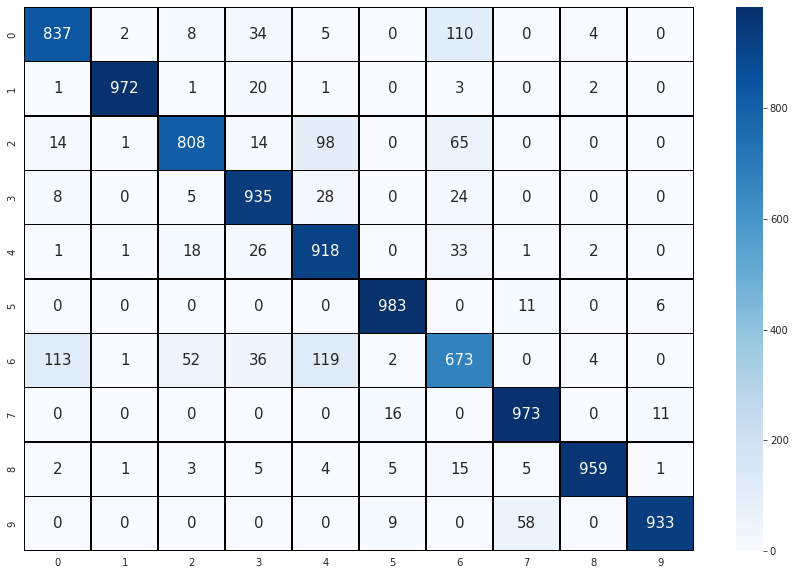

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# Modelling-2

In [54]:
model2 = Sequential()

model2.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid
                            # dropout was not used. 
                           

model2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu')) 
model2.add(MaxPool2D(pool_size=(2, 2)))    

model2.add(Flatten())

model2.add(Dense(256, activation='relu')) # Using drop out in feed forwarding section gives better results. 
model2.add(Dropout(0.1))

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.1))

model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.1))

model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.1))

model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [55]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        8096      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_5 (Dense)             (None, 256)              

In [56]:
model2.fit(X_train, Y_train, batch_size=32, epochs=40, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5818 - accuracy: 0.7865 - val_loss: 0.3859 - val_accuracy: 0.8685
Epoch 2/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3613 - accuracy: 0.8740 - val_loss: 0.3387 - val_accuracy: 0.8814
Epoch 3/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3287 - accuracy: 0.8882 - val_loss: 0.3810 - val_accuracy: 0.8593
Epoch 4/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3203 - accuracy: 0.8900 - val_loss: 0.4460 - val_accuracy: 0.8810
Epoch 5/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3237 - accuracy: 0.8902 - val_loss: 0.3359 - val_accuracy: 0.8861
Epoch 6/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3422 - accuracy: 0.8864 - val_loss: 0.3801 - val_accuracy: 0.8655
Epoch 7/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3650 - accuracy: 0.8820 - val_loss: 0.3644 - val_accu

In [57]:
model2.metrics_names

['loss', 'accuracy']

In [58]:
summary = pd.DataFrame(model2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.582,0.786,0.386,0.868
1,0.361,0.874,0.339,0.881
2,0.329,0.888,0.381,0.859
3,0.320,0.890,0.446,0.881
4,0.324,0.890,0.336,0.886


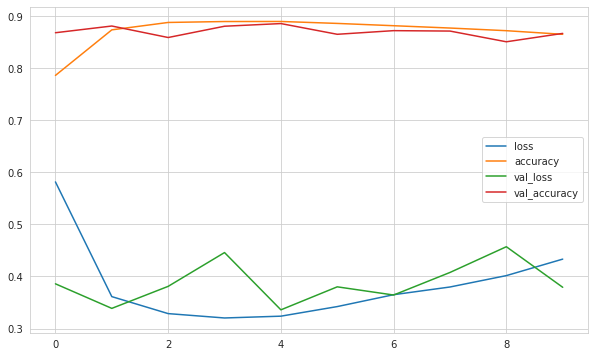

In [59]:
summary.plot();
# But I don't understand why loss values are not good at graphic?

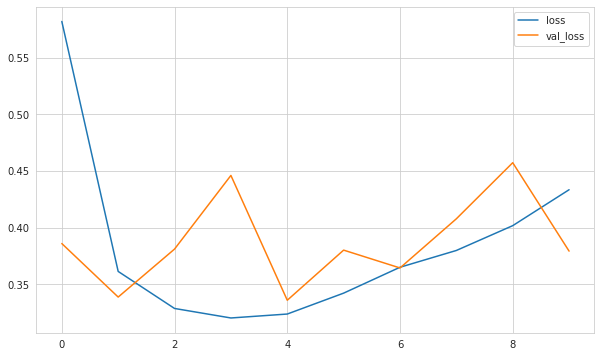

In [61]:
summary[["loss", "val_loss"]].plot();

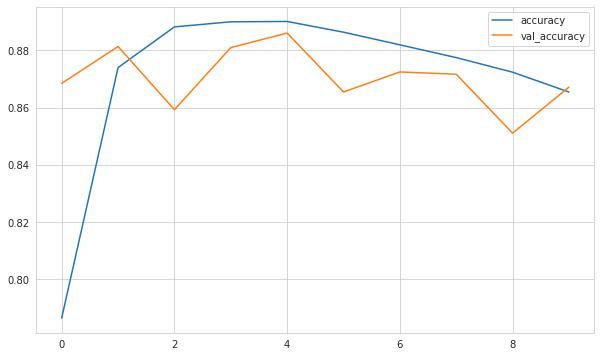

In [62]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data¶

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
model2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3359 - accuracy: 0.8861


[0.33591151237487793, 0.8860999941825867]

In [65]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.33591151237487793
Test accuracy: 0.8860999941825867


In [66]:
pred_prob = model2.predict(X_test)

In [72]:
y_pred = np.argmax(pred_prob, axis=1)

In [67]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.90      0.81      0.85      1000
           3       0.87      0.94      0.90      1000
           4       0.78      0.92      0.84      1000
           5       0.97      0.98      0.98      1000
           6       0.73      0.67      0.70      1000
           7       0.93      0.97      0.95      1000
           8       0.99      0.96      0.97      1000
           9       0.98      0.93      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



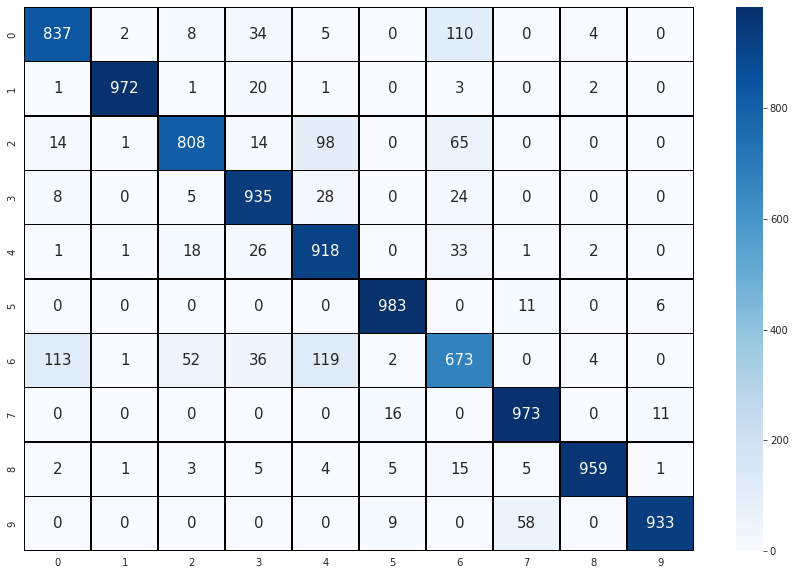

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# Modelling-3

In [70]:
model3 = Sequential()

model3.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2))) 


model3.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2))) 


model3.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2))) 
model3.add(BatchNormalization())



model3.add(Flatten())

model3.add(Dense(256, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.1))

model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.1))

model3.add(Dense(64, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.1))

model3.add(Dense(32, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.1))

model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [71]:
model3.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                      

In [72]:
model3.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])



Epoch 1/50
1875/1875 [==============================] - 20s 9ms/step - loss: 0.5896 - accuracy: 0.7973 - val_loss: 0.3985 - val_accuracy: 0.8612
Epoch 2/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3842 - accuracy: 0.8689 - val_loss: 0.3266 - val_accuracy: 0.8811
Epoch 3/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3312 - accuracy: 0.8866 - val_loss: 0.2827 - val_accuracy: 0.8989
Epoch 4/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3028 - accuracy: 0.8957 - val_loss: 0.3187 - val_accuracy: 0.8868
Epoch 5/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2856 - accuracy: 0.9028 - val_loss: 0.2834 - val_accuracy: 0.9010
Epoch 6/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2693 - accuracy: 0.9078 - val_loss: 0.2803 - val_accuracy: 0.8999
Epoch 7/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2571 - accuracy: 0.9129 - val_loss: 0.2635 - val_ac

In [73]:
summary = pd.DataFrame(model3.history.history)
summary.head()



,loss,accuracy,val_loss,val_accuracy
0,0.590,0.797,0.399,0.861
1,0.384,0.869,0.327,0.881
2,0.331,0.887,0.283,0.899
3,0.303,0.896,0.319,0.887
4,0.286,0.903,0.283,0.901


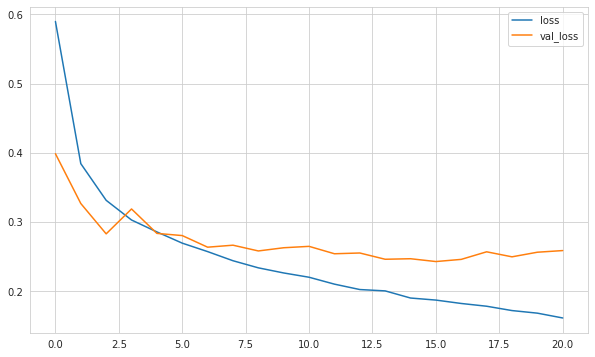

In [74]:
summary[["loss", "val_loss"]].plot();



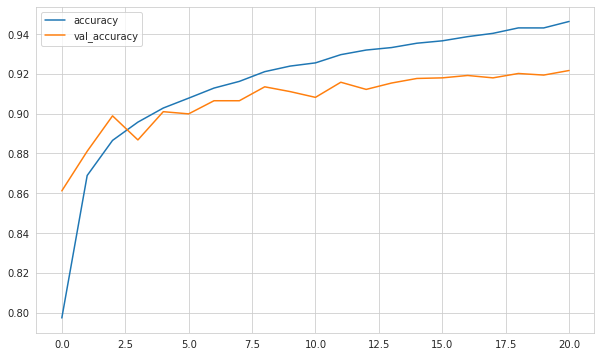

In [76]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data¶

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
model3.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2427 - accuracy: 0.9180


[0.24273516237735748, 0.9179999828338623]

In [79]:
score = model3.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24273516237735748
Test accuracy: 0.9179999828338623


In [80]:
pred_prob = model3.predict(X_test)

In [81]:
y_pred = np.argmax(pred_prob, axis=1)

In [82]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.90      0.88      1000
           3       0.90      0.94      0.92      1000
           4       0.89      0.84      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.80      0.78      1000
           7       0.96      0.97      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



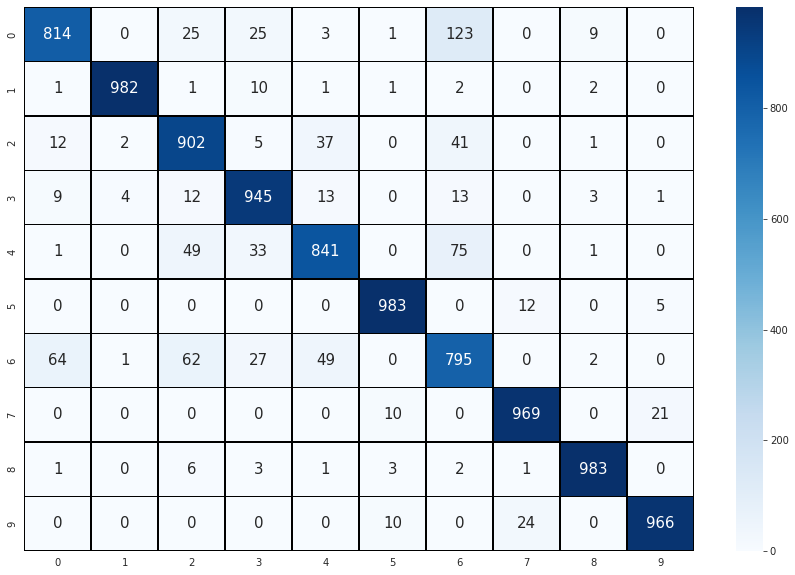

In [84]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# Modelling-4

In [36]:
model4 = Sequential()

model4.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model4.add(BatchNormalization())
model4.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPool2D(pool_size=(2, 2))) 


model4.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model4.add(BatchNormalization())
model4.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPool2D(pool_size=(2, 2))) 


model4.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPool2D(pool_size=(2, 2)))


model4.add(Flatten())

model4.add(Dense(128, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.1))

model4.add(Dense(64, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.1))

model4.add(Dense(32, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.1))

model4.add(Dense(28, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.1))

model4.add(Dense(10, activation='softmax'))

model4.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [37]:
model4.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization_9 (Batc  (None, 26, 26, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_10 (Bat  (None, 24, 24, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                      

In [38]:
model4.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])



Epoch 1/50
1875/1875 [==============================] - 23s 10ms/step - loss: 0.6549 - accuracy: 0.7762 - val_loss: 0.4401 - val_accuracy: 0.8414
Epoch 2/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4094 - accuracy: 0.8620 - val_loss: 0.3283 - val_accuracy: 0.8823
Epoch 3/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3577 - accuracy: 0.8801 - val_loss: 0.4467 - val_accuracy: 0.8451
Epoch 4/50
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3264 - accuracy: 0.8899 - val_loss: 0.3566 - val_accuracy: 0.8789
Epoch 5/50
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3024 - accuracy: 0.8983 - val_loss: 0.2853 - val_accuracy: 0.8983
Epoch 6/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2825 - accuracy: 0.9058 - val_loss: 0.2779 - val_accuracy: 0.9018
Epoch 7/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2665 - accuracy: 0.9113 - val_loss: 0.2552 - v

In [39]:
summary = pd.DataFrame(model4.history.history)
summary.head()



,loss,accuracy,val_loss,val_accuracy
0,0.655,0.776,0.440,0.841
1,0.409,0.862,0.328,0.882
2,0.358,0.880,0.447,0.845
3,0.326,0.890,0.357,0.879
4,0.302,0.898,0.285,0.898


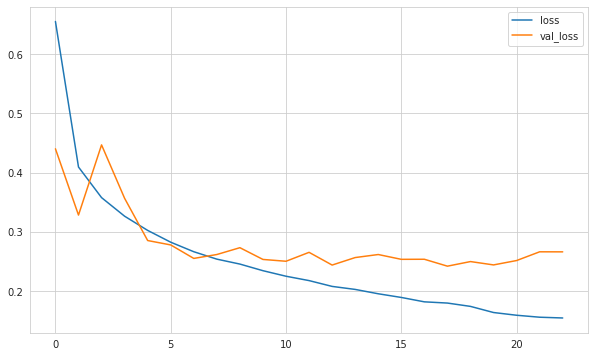

In [40]:
summary[["loss", "val_loss"]].plot();



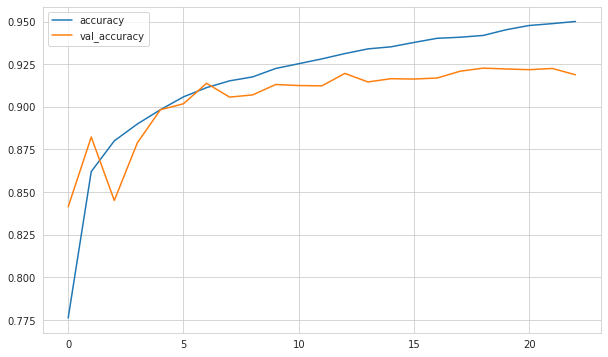

In [41]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data¶

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
model4.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.2421 - accuracy: 0.9209


[0.24209922552108765, 0.9208999872207642]

In [44]:
score = model4.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24209922552108765
Test accuracy: 0.9208999872207642


In [45]:
pred_prob = model4.predict(X_test)

In [46]:
y_pred = np.argmax(pred_prob, axis=1)

In [47]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.86      0.90      0.88      1000
           3       0.90      0.94      0.92      1000
           4       0.92      0.84      0.88      1000
           5       0.99      0.98      0.98      1000
           6       0.77      0.78      0.77      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



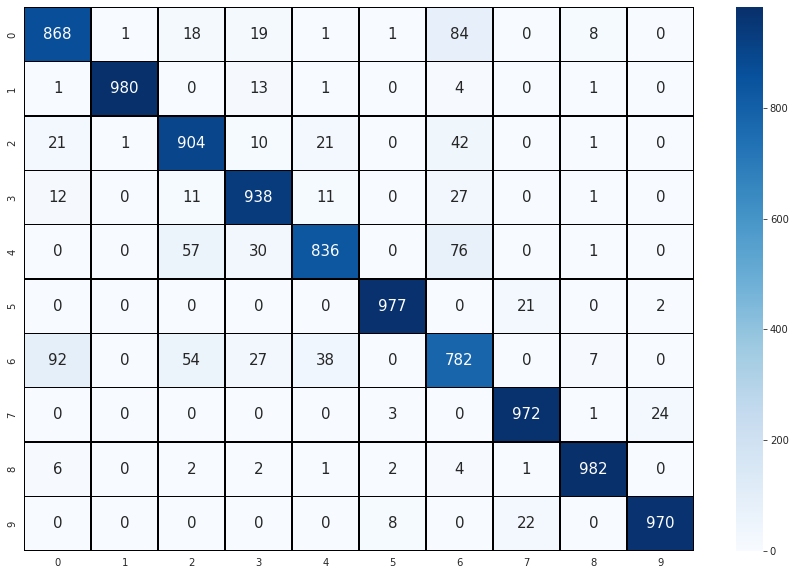

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

## Prediction

In [50]:
my_image = X_test[6]

In [51]:
my_image.shape

(28, 28, 1)

In [52]:
image_prediction = model4.predict(my_image.reshape(1,28,28,1))

In [53]:
image_prediction

array([[1.8268735e-03, 2.6228105e-05, 2.5326863e-01, 5.5865763e-04,
        7.4001825e-01, 7.8536023e-06, 4.1251173e-03, 7.0437622e-05,
        2.8505114e-05, 6.9544927e-05]], dtype=float32)

In [54]:
np.argmax(image_prediction, axis=1)

array([4])

In [55]:
result=np.argmax(image_prediction, axis=1)

In [56]:
result

array([4])

In [57]:
classes[int(result)]

'Coat'

In [59]:
model4.save("Assign_cnn")

In [60]:
model4=tf.keras.models.load_model("Assign_cnn")

In [62]:
X_test[12].shape

(28, 28, 1)

In [63]:
pred=model4.predict(np.expand_dims(X_test[12],axis=0))

In [64]:
np.argmax(pred)

5

In [ ]:
#np.expand_dims(X_test[12],axis=0).shape

(1, 28, 28, 1)

In [65]:
pred=model4.predict(np.expand_dims(X_test[12],axis=0))

In [66]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___